In [1]:
import matplotlib.pyplot as plt

from torchvision.datasets.cifar import CIFAR10
from torchvision.transforms import ToTensor

In [4]:
trainset = CIFAR10(
    root='./',
    train=True,
    download=True,
    transform=ToTensor())
testset = CIFAR10(
    root='./',
    train=False,
    download=True,
    transform=ToTensor())

Files already downloaded and verified
Files already downloaded and verified


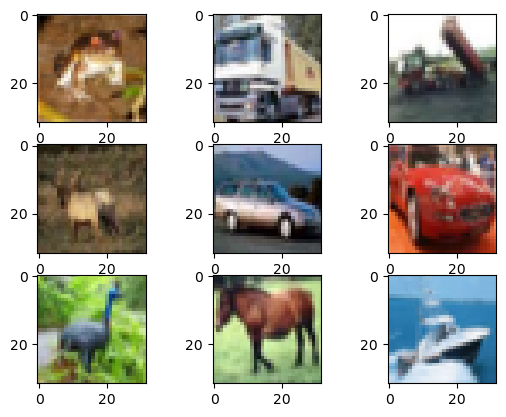

In [8]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(trainset.data[i])  #trainset.data  <--- numpy array형태 (H,W,C)     tensor형태(C,H,W)

plt.show()

Files already downloaded and verified
Files already downloaded and verified


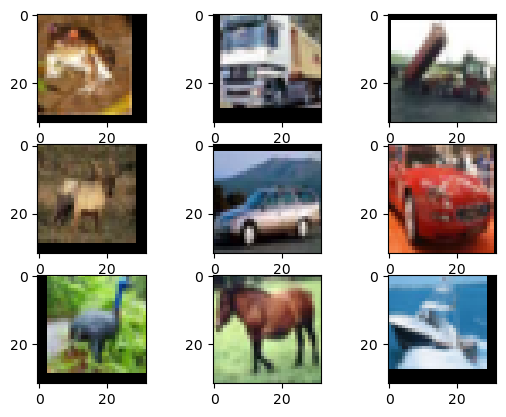

In [28]:
import torchvision.transforms as T
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop

transforms = Compose([
   #T.ToPILImage(),
    RandomCrop((32,32),padding=4),
    RandomHorizontalFlip(p=0.5),
])

trainset = CIFAR10(
    root='./',
    train=True,
    download=True,
    transform=transforms)
testset = CIFAR10(
    root='./',
    train=False,
    download=True,
    transform=transforms)

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(trainset[i][0]) 
plt.show()


Files already downloaded and verified
Files already downloaded and verified


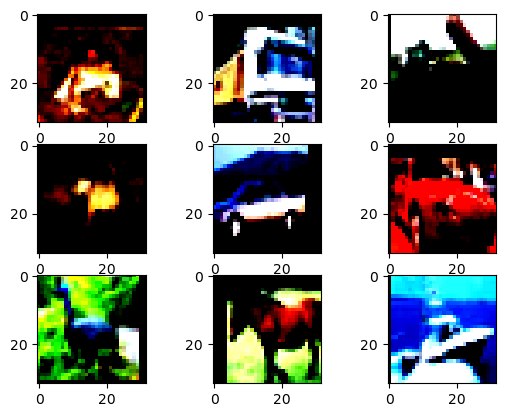

In [60]:
import torchvision.transforms as T
from torchvision.transforms import Compose
from torchvision.transforms import RandomHorizontalFlip, RandomCrop, Normalize
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import numpy as np

transforms = Compose([
    #T.ToPILImage(),
    RandomCrop((32,32),padding=4),
    RandomHorizontalFlip(p=0.5),
    T.ToTensor(),
    Normalize(mean=(0.4914,0.4822,0.4465),std=(0.247,0.243,0.261))  #Normalize -> 텐서상태를 받아야함
])

trainset = CIFAR10(root='./',
                   train=True,
                   download=True,
                   transform=transforms)

testset = CIFAR10(root='./',
                  train=False,
                  download=True,
                  transform=transforms)

for i in range(9):
    plt.subplot(3,3,i+1)
    image = trainset[i][0].permute(1, 2, 0).numpy()
    clipped_image = np.clip(image, 0, 1)  # [0, 1] 범위로 데이터 클리핑
    plt.imshow(clipped_image)
               
plt.show()

In [48]:
trainset = CIFAR10(root='./',
                   train=True,
                   download=True,
                   transform=transforms)

testset = CIFAR10(root='./',
                  train=False,
                  download=True,
                  transform=transforms)

Files already downloaded and verified
Files already downloaded and verified


In [78]:
trainset[0][0].shape # image 

torch.Size([3, 32, 32])

In [79]:
trainset[0][1] #label

6

In [63]:
import torch

In [85]:
x1 = torch.randn(3,128,128)
x2 = torch.randn(3,128,128)

c = torch.stack((x1,x2), dim=0).shape
print(c)
d = torch.stack((x1,x2), dim=1).shape
print(d)

torch.Size([2, 3, 128, 128])
torch.Size([3, 2, 128, 128])


In [88]:
## 직접 Normalize하기
imgs = [item[0] for item in trainset]  # trainset은 tensor형태로 이루어진 data+label의 튜플형태  ##0...1.. each image:(data,label)
imgs = torch.stack(imgs, dim=0).numpy() # image i 합치기  

mean_r = imgs[:,0,:,:].mean()   # C H W  -> CIFAR10 load하면 tensor형태라서 
print(len(imgs))
mean_g = imgs[:,1,:,:].mean() 
mean_b = imgs[:,2,:,:].mean()
print(mean_r,mean_g,mean_b)

std_r = imgs[:,0,:,:].std()
std_g = imgs[:,1,:,:].std()
std_b = imgs[:,2,:,:].std()
print(std_r,std_g,std_b)


50000
-0.27010757 -0.27682287 -0.23968856
1.1448044 1.1431799 1.0896589
